In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.stats import ttest_ind, binom_test, spearmanr
from statsmodels.stats.proportion import proportions_ztest
import matplotlib as mpl
import scipy.stats as stats
import statistics
import math
import pingouin as pg


In [201]:
raw_correctness_data = pd.read_csv('./correctness_scores.csv')
raw_correctness_data.shape
raw_correctness_data.dtypes

participant_id     object
session             int64
session_type       object
problem_set        object
problem_num        object
best_time          object
best_score        float64
last_time          object
last_score        float64
dtype: object

In [202]:
print("Total num of participants: {}".format(len(raw_correctness_data['participant_id'].unique())))

eligible_participants_data = raw_correctness_data.groupby('participant_id').filter(lambda x: set(x['session']) == {1, 2})
print("Total num of participants who complete both sessions: {}".format(len(eligible_participants_data['participant_id'].unique())))

eligible_high_first_participants_data = eligible_participants_data[(eligible_participants_data['session'] == 1) & (eligible_participants_data['session_type'] == 'High')]
number_of_high_first_participants = eligible_high_first_participants_data['participant_id'].nunique()
print("Total num of participants who have high session first: {}".format(number_of_high_first_participants))

Total num of participants: 73
Total num of participants who complete both sessions: 71
Total num of participants who have high session first: 35


# RQ1 Impacts on Programming Correctess

In [203]:
print("Correctness - Using best scores")
high_easy1 = eligible_participants_data[(eligible_participants_data['session_type'] == 'High') & (eligible_participants_data['problem_num'] == '1')]['best_score']
sober_easy1 = eligible_participants_data[(eligible_participants_data['session_type'] == 'Sober') & (eligible_participants_data['problem_num'] == '1')]['best_score']
print("-"*20, "easy1", "-"*20)
print("High: ", len(high_easy1), statistics.mean(high_easy1))
print("Sober: ", len(sober_easy1), statistics.mean(sober_easy1))
print(stats.ttest_rel(high_easy1, sober_easy1))
cohen_d = pg.compute_effsize(high_easy1,sober_easy1, paired=True)
print("d: ", cohen_d)

high_easy2 = eligible_participants_data[(eligible_participants_data['session_type'] == 'High') & (eligible_participants_data['problem_num'] == '2')]['best_score']
sober_easy2 = eligible_participants_data[(eligible_participants_data['session_type'] == 'Sober') & (eligible_participants_data['problem_num'] == '2')]['best_score']
print("-"*20, "easy2", "-"*20)
print("High: ", len(high_easy2), statistics.mean(high_easy2))
print("Sober: ", len(sober_easy2), statistics.mean(sober_easy2))
print(stats.ttest_rel(high_easy2, sober_easy2))
cohen_d = pg.compute_effsize(high_easy2,sober_easy2, paired=True)
print("d: ", cohen_d)

high_medium3 = eligible_participants_data[(eligible_participants_data['session_type'] == 'High') & (eligible_participants_data['problem_num'] == '3')]['best_score']
sober_medium3 = eligible_participants_data[(eligible_participants_data['session_type'] == 'Sober') & (eligible_participants_data['problem_num'] == '3')]['best_score']
print("-"*20, "medium3", "-"*20)
print("High: ", len(high_medium3), statistics.mean(high_medium3))
print("Sober: ", len(sober_medium3), statistics.mean(sober_medium3))
print(stats.ttest_rel(high_medium3, sober_medium3))
cohen_d = pg.compute_effsize(high_medium3,sober_medium3, paired=True)
print("d: ", cohen_d)

Correctness - Using best scores
-------------------- easy1 --------------------
High:  71 0.5639019300991132
Sober:  71 0.6589071465832029
TtestResult(statistic=-2.168261768474209, pvalue=0.03353992949180419, df=70)
d:  -0.2780459642644511
-------------------- easy2 --------------------
High:  71 0.34465617232808615
Sober:  71 0.4848108257387462
TtestResult(statistic=-2.5754442105166375, pvalue=0.012125418376346198, df=70)
d:  -0.35009380393540174
-------------------- medium3 --------------------
High:  71 0.4840082159624413
Sober:  71 0.5387323943661971
TtestResult(statistic=-0.8782922740703654, pvalue=0.38278992152421687, df=70)
d:  -0.15021537690674414


In [204]:
print("Correctness - Using last scores")
high_easy1 = eligible_participants_data[(eligible_participants_data['session_type'] == 'High') & (eligible_participants_data['problem_num'] == '1')]['last_score']
sober_easy1 = eligible_participants_data[(eligible_participants_data['session_type'] == 'Sober') & (eligible_participants_data['problem_num'] == '1')]['last_score']
print("-"*20, "easy1", "-"*20)
print("High: ", len(high_easy1), statistics.mean(high_easy1))
print("Sober: ", len(sober_easy1), statistics.mean(sober_easy1))
print(stats.ttest_rel(high_easy1, sober_easy1))
cohen_d = pg.compute_effsize(high_easy1,sober_easy1, paired=True)
print("d: ", cohen_d)

high_easy2 = eligible_participants_data[(eligible_participants_data['session_type'] == 'High') & (eligible_participants_data['problem_num'] == '2')]['last_score']
sober_easy2 = eligible_participants_data[(eligible_participants_data['session_type'] == 'Sober') & (eligible_participants_data['problem_num'] == '2')]['last_score']
print("-"*20, "easy2", "-"*20)
print("High: ", len(high_easy2), statistics.mean(high_easy2))
print("Sober: ", len(sober_easy2), statistics.mean(sober_easy2))
print(stats.ttest_rel(high_easy2, sober_easy2))
cohen_d = pg.compute_effsize(high_easy2,sober_easy2, paired=True)
print("d: ", cohen_d)

high_medium3 = eligible_participants_data[(eligible_participants_data['session_type'] == 'High') & (eligible_participants_data['problem_num'] == '3')]['last_score']
sober_medium3 = eligible_participants_data[(eligible_participants_data['session_type'] == 'Sober') & (eligible_participants_data['problem_num'] == '3')]['last_score']
print("-"*20, "medium3", "-"*20)
print("High: ", len(high_medium3), statistics.mean(high_medium3))
print("Sober: ", len(sober_medium3), statistics.mean(sober_medium3))
print(stats.ttest_rel(high_medium3, sober_medium3))
cohen_d = pg.compute_effsize(high_medium3,sober_medium3, paired=True)
print("d: ", cohen_d)

Correctness - Using last scores
-------------------- easy1 --------------------
High:  71 0.489697443922796
Sober:  71 0.6235002608242045
TtestResult(statistic=-2.5990941668752243, pvalue=0.011390517933998303, df=70)
d:  -0.3420464764829603
-------------------- easy2 --------------------
High:  71 0.2907000828500414
Sober:  71 0.46233775200220933
TtestResult(statistic=-3.0233980155975995, pvalue=0.0034916090379073558, df=70)
d:  -0.4093845037848082
-------------------- medium3 --------------------
High:  71 0.4074237089201878
Sober:  71 0.4737382629107981
TtestResult(statistic=-0.9480834775890002, pvalue=0.34634859803012463, df=70)
d:  -0.15891502945508446


# RQ2: Impacts on Programming Speed

In [205]:
raw_speed_analysis_data = pd.read_csv('./speed_analysis.csv')
print(raw_speed_analysis_data.shape)
raw_speed_analysis_data.dtypes

(411, 11)


participant_id                  object
session                          int64
session_type                    object
problem_set                     object
problem_num                     object
total_num_typing_keystrokes      int64
total_num_deletes                int64
total_seconds                  float64
total_idle_time                float64
total_active_time              float64
typing_speed                   float64
dtype: object

In [206]:

eligible_speed_analysis_data = raw_speed_analysis_data.groupby('participant_id').filter(lambda x: set(x['session']) == {1, 2})
print("Total num of participants who have both sessions keystrokes recorded: {}".format(len(eligible_speed_analysis_data['participant_id'].unique())))

Total num of participants who have both sessions keystrokes recorded: 65


In [207]:
high_easy1_eligible_analysis_data = eligible_speed_analysis_data[ (eligible_speed_analysis_data['session_type'] == 'High')&(eligible_speed_analysis_data['problem_num'] == 'problem1') & (eligible_speed_analysis_data['typing_speed'] > 0)]
sober_easy1_eligible_analysis_data = eligible_speed_analysis_data[ (eligible_speed_analysis_data['session_type'] == 'Sober')&(eligible_speed_analysis_data['problem_num'] == 'problem1') & (eligible_speed_analysis_data['typing_speed'] > 0)]
high_easy1_eligible_analysis_data =  high_easy1_eligible_analysis_data[high_easy1_eligible_analysis_data['participant_id'].isin(sober_easy1_eligible_analysis_data['participant_id'])]
sober_easy1_eligible_analysis_data =  sober_easy1_eligible_analysis_data[sober_easy1_eligible_analysis_data['participant_id'].isin(high_easy1_eligible_analysis_data['participant_id'])]

high_easy2_eligible_analysis_data = eligible_speed_analysis_data[ (eligible_speed_analysis_data['session_type'] == 'High')&(eligible_speed_analysis_data['problem_num'] == 'problem2') & (eligible_speed_analysis_data['typing_speed'] > 0)]
sober_easy2_eligible_analysis_data = eligible_speed_analysis_data[ (eligible_speed_analysis_data['session_type'] == 'Sober')&(eligible_speed_analysis_data['problem_num'] == 'problem2') & (eligible_speed_analysis_data['typing_speed'] > 0)]
high_easy2_eligible_analysis_data =  high_easy2_eligible_analysis_data[high_easy2_eligible_analysis_data['participant_id'].isin(sober_easy2_eligible_analysis_data['participant_id'])]
sober_easy2_eligible_analysis_data =  sober_easy2_eligible_analysis_data[sober_easy2_eligible_analysis_data['participant_id'].isin(high_easy2_eligible_analysis_data['participant_id'])]

high_medium3_eligible_analysis_data = eligible_speed_analysis_data[ (eligible_speed_analysis_data['session_type'] == 'High')&(eligible_speed_analysis_data['problem_num'] == 'problem3') & (eligible_speed_analysis_data['typing_speed'] > 0)]
sober_medium3_eligible_analysis_data = eligible_speed_analysis_data[ (eligible_speed_analysis_data['session_type'] == 'Sober')&(eligible_speed_analysis_data['problem_num'] == 'problem3') & (eligible_speed_analysis_data['typing_speed'] > 0)]
high_medium3_eligible_analysis_data =  high_medium3_eligible_analysis_data[high_medium3_eligible_analysis_data['participant_id'].isin(sober_medium3_eligible_analysis_data['participant_id'])]
sober_medium3_eligible_analysis_data =  sober_medium3_eligible_analysis_data[sober_medium3_eligible_analysis_data['participant_id'].isin(high_medium3_eligible_analysis_data['participant_id'])]



In [208]:

print("Typing speed:")
high_easy1_speed = high_easy1_eligible_analysis_data['typing_speed']*60
sober_easy1_speed = sober_easy1_eligible_analysis_data['typing_speed']*60
print("-"*20, "easy1", "-"*20)
print("High: ", len(high_easy1_speed), statistics.mean(high_easy1_speed))
print("Sober: ", len(sober_easy1_speed), statistics.mean(sober_easy1_speed))
print(stats.ttest_rel(high_easy1_speed, sober_easy1_speed))
cohen_d = pg.compute_effsize(high_easy1_speed,sober_easy1_speed, paired=True)
print("d: ", cohen_d)

high_easy2_speed = high_easy2_eligible_analysis_data['typing_speed']*60
sober_easy2_speed = sober_easy2_eligible_analysis_data['typing_speed']*60
print("-"*20, "easy2", "-"*20)
print("High: ", len(high_easy2_speed), statistics.mean(high_easy2_speed))
print("Sober: ", len(sober_easy2_speed), statistics.mean(sober_easy2_speed))
print(stats.ttest_rel(high_easy2_speed, sober_easy2_speed))
cohen_d = pg.compute_effsize(high_easy2_speed,sober_easy2_speed, paired=True)
print("d: ", cohen_d)

high_medium3_speed = high_medium3_eligible_analysis_data['typing_speed']*60
sober_medium3_speed = sober_medium3_eligible_analysis_data['typing_speed']*60
print("-"*20, "medium3", "-"*20)
print("High: ", len(high_medium3_speed), statistics.mean(high_medium3_speed))
print("Sober: ", len(sober_medium3_speed), statistics.mean(sober_medium3_speed))
print(stats.ttest_rel(high_medium3_speed, sober_medium3_speed))
cohen_d = pg.compute_effsize(high_medium3_speed,sober_medium3_speed, paired=True)
print("d: ", cohen_d)



Typing speed:
-------------------- easy1 --------------------
High:  65 101.48923245961592
Sober:  65 108.97571602792449
TtestResult(statistic=-2.96253500729863, pvalue=0.0042790710445183835, df=64)
d:  -0.29893374232100034
-------------------- easy2 --------------------
High:  65 117.14407941062613
Sober:  65 120.10470657681373
TtestResult(statistic=-0.9284044800690489, pvalue=0.35668613106317926, df=64)
d:  -0.10870647179685135
-------------------- medium3 --------------------
High:  64 102.31528343047943
Sober:  64 108.93377017644693
TtestResult(statistic=-2.604771469803406, pvalue=0.011455416531083487, df=63)
d:  -0.2733675793151699


In [209]:
print("Typing speed overall: using formula total_num_of_typing_keystrokes/total_active_time")
high_speed=[]
sober_speed=[]
for participant_id in sorted(high_easy1_eligible_analysis_data["participant_id"]):
    high_active_time, high_keystrokes= 0,0
    if participant_id not in list(high_medium3_eligible_analysis_data["participant_id"].unique()):
        continue
    easy1_keystrokes=high_easy1_eligible_analysis_data[high_easy1_eligible_analysis_data["participant_id"]==participant_id]["total_num_typing_keystrokes"].iloc[0]
    easy2_keystrokes=high_easy2_eligible_analysis_data[high_easy2_eligible_analysis_data["participant_id"]==participant_id]["total_num_typing_keystrokes"].iloc[0]
    medium3_keystrokes=high_medium3_eligible_analysis_data[high_medium3_eligible_analysis_data["participant_id"]==participant_id]["total_num_typing_keystrokes"].iloc[0]
    easy1_active_time=high_easy1_eligible_analysis_data[high_easy1_eligible_analysis_data["participant_id"]==participant_id]["total_active_time"].iloc[0]
    easy2_active_time=high_easy2_eligible_analysis_data[high_easy2_eligible_analysis_data["participant_id"]==participant_id]["total_active_time"].iloc[0]
    medium3_active_time=high_medium3_eligible_analysis_data[high_medium3_eligible_analysis_data["participant_id"]==participant_id]["total_active_time"].iloc[0]
    high_keystrokes=easy1_keystrokes+easy2_keystrokes+medium3_keystrokes
    high_active_time=easy1_active_time+easy2_active_time+medium3_active_time
    high_speed.append(60*high_keystrokes/high_active_time)
for participant_id in sorted(sober_easy1_eligible_analysis_data["participant_id"]):
    sober_active_time, sober_keystrokes= 0,0
    if participant_id not in list(sober_medium3_eligible_analysis_data["participant_id"].unique()):
        continue
    easy1_keystrokes=sober_easy1_eligible_analysis_data[sober_easy1_eligible_analysis_data["participant_id"]==participant_id]["total_num_typing_keystrokes"].iloc[0]
    easy2_keystrokes=sober_easy2_eligible_analysis_data[sober_easy2_eligible_analysis_data["participant_id"]==participant_id]["total_num_typing_keystrokes"].iloc[0]
    medium3_keystrokes=sober_medium3_eligible_analysis_data[sober_medium3_eligible_analysis_data["participant_id"]==participant_id]["total_num_typing_keystrokes"].iloc[0]
    easy1_active_time=sober_easy1_eligible_analysis_data[sober_easy1_eligible_analysis_data["participant_id"]==participant_id]["total_active_time"].iloc[0]
    easy2_active_time=sober_easy2_eligible_analysis_data[sober_easy2_eligible_analysis_data["participant_id"]==participant_id]["total_active_time"].iloc[0]
    medium3_active_time=sober_medium3_eligible_analysis_data[sober_medium3_eligible_analysis_data["participant_id"]==participant_id]["total_active_time"].iloc[0]
    sober_keystrokes=easy1_keystrokes+easy2_keystrokes+medium3_keystrokes
    sober_active_time=easy1_active_time+easy2_active_time+medium3_active_time
    sober_speed.append(60*sober_keystrokes/sober_active_time)
print("-"*20, "easy1+easy2+medium3", "-"*20)
print("High: ", len(high_speed), statistics.mean(high_speed))
print("Sober: ", len(sober_speed), statistics.mean(sober_speed))
print(stats.ttest_rel(high_speed, sober_speed))
cohen_d = pg.compute_effsize(high_speed,sober_speed, paired=True)
print("d: ",cohen_d)

print("\n\nTyping speed overall: using fomula total_num_of_typing_keystrokes-total_num_deletes/total_active_time")
high_speed=[]
sober_speed=[]
for participant_id in sorted(high_easy1_eligible_analysis_data["participant_id"]):
    high_active_time, high_keystrokes= 0,0
    if participant_id not in list(high_medium3_eligible_analysis_data["participant_id"].unique()):
        continue
    easy1_keystrokes=high_easy1_eligible_analysis_data[high_easy1_eligible_analysis_data["participant_id"]==participant_id]["total_num_typing_keystrokes"].iloc[0]-high_easy1_eligible_analysis_data[high_easy1_eligible_analysis_data["participant_id"]==participant_id]["total_num_deletes"].iloc[0]
    easy2_keystrokes=high_easy2_eligible_analysis_data[high_easy2_eligible_analysis_data["participant_id"]==participant_id]["total_num_typing_keystrokes"].iloc[0]-high_easy2_eligible_analysis_data[high_easy2_eligible_analysis_data["participant_id"]==participant_id]["total_num_deletes"].iloc[0]
    medium3_keystrokes=high_medium3_eligible_analysis_data[high_medium3_eligible_analysis_data["participant_id"]==participant_id]["total_num_typing_keystrokes"].iloc[0]-high_medium3_eligible_analysis_data[high_medium3_eligible_analysis_data["participant_id"]==participant_id]["total_num_deletes"].iloc[0]
    easy1_active_time=high_easy1_eligible_analysis_data[high_easy1_eligible_analysis_data["participant_id"]==participant_id]["total_active_time"].iloc[0]
    easy2_active_time=high_easy2_eligible_analysis_data[high_easy2_eligible_analysis_data["participant_id"]==participant_id]["total_active_time"].iloc[0]
    medium3_active_time=high_medium3_eligible_analysis_data[high_medium3_eligible_analysis_data["participant_id"]==participant_id]["total_active_time"].iloc[0]
    high_keystrokes=easy1_keystrokes+easy2_keystrokes+medium3_keystrokes
    high_active_time=easy1_active_time+easy2_active_time+medium3_active_time
    high_speed.append(60*high_keystrokes/high_active_time)
for participant_id in sorted(sober_easy1_eligible_analysis_data["participant_id"]):
    sober_active_time, sober_keystrokes= 0,0
    if participant_id not in list(sober_medium3_eligible_analysis_data["participant_id"].unique()):
        continue
    easy1_keystrokes=sober_easy1_eligible_analysis_data[sober_easy1_eligible_analysis_data["participant_id"]==participant_id]["total_num_typing_keystrokes"].iloc[0]-sober_easy1_eligible_analysis_data[sober_easy1_eligible_analysis_data["participant_id"]==participant_id]["total_num_deletes"].iloc[0]
    easy2_keystrokes=sober_easy2_eligible_analysis_data[sober_easy2_eligible_analysis_data["participant_id"]==participant_id]["total_num_typing_keystrokes"].iloc[0]-sober_easy2_eligible_analysis_data[sober_easy2_eligible_analysis_data["participant_id"]==participant_id]["total_num_deletes"].iloc[0]
    medium3_keystrokes=sober_medium3_eligible_analysis_data[sober_medium3_eligible_analysis_data["participant_id"]==participant_id]["total_num_typing_keystrokes"].iloc[0]-sober_medium3_eligible_analysis_data[sober_medium3_eligible_analysis_data["participant_id"]==participant_id]["total_num_deletes"].iloc[0]
    easy1_active_time=sober_easy1_eligible_analysis_data[sober_easy1_eligible_analysis_data["participant_id"]==participant_id]["total_active_time"].iloc[0]
    easy2_active_time=sober_easy2_eligible_analysis_data[sober_easy2_eligible_analysis_data["participant_id"]==participant_id]["total_active_time"].iloc[0]
    medium3_active_time=sober_medium3_eligible_analysis_data[sober_medium3_eligible_analysis_data["participant_id"]==participant_id]["total_active_time"].iloc[0]
    sober_keystrokes=easy1_keystrokes+easy2_keystrokes+medium3_keystrokes
    sober_active_time=easy1_active_time+easy2_active_time+medium3_active_time
    sober_speed.append(60*sober_keystrokes/sober_active_time)
print("-"*20, "easy1+easy2+medium3", "-"*20)
print("High: ", len(high_speed), statistics.mean(high_speed))
print("Sober: ", len(sober_speed), statistics.mean(sober_speed))
print(stats.ttest_rel(high_speed, sober_speed))
cohen_d = pg.compute_effsize(high_speed,sober_speed, paired=True)
print("d: ",cohen_d)


Typing speed overall: using formula total_num_of_typing_keystrokes/total_active_time


-------------------- easy1+easy2+medium3 --------------------
High:  64 106.05815093343155
Sober:  64 111.229564201148
TtestResult(statistic=-2.750114986150026, pvalue=0.007766333779561378, df=63)
d:  -0.23465494205442006


Typing speed overall: using fomula total_num_of_typing_keystrokes-total_num_deletes/total_active_time
-------------------- easy1+easy2+medium3 --------------------
High:  64 84.20650964298503
Sober:  64 90.75788080965842
TtestResult(statistic=-3.710403182852476, pvalue=0.00043990007818987505, df=63)
d:  -0.32124580039050893


In [210]:
print("Delete percentage:")
high_easy1_delete_percentage = high_easy1_eligible_analysis_data
sober_easy1_delete_percentage = sober_easy1_eligible_analysis_data
high_easy1_delete_percentage['delete_percentage'] = high_easy1_delete_percentage['total_num_deletes']/ high_easy1_delete_percentage['total_num_typing_keystrokes']
sober_easy1_delete_percentage['delete_percentage'] = sober_easy1_delete_percentage['total_num_deletes']/ sober_easy1_delete_percentage['total_num_typing_keystrokes']
print("-"*20, "easy1", "-"*20)
print("High: ", len(high_easy1_delete_percentage['delete_percentage']), statistics.mean(high_easy1_delete_percentage['delete_percentage']))
print("Sober: ", len(sober_easy1_delete_percentage['delete_percentage']), statistics.mean(sober_easy1_delete_percentage['delete_percentage']))
print(stats.ttest_rel(high_easy1_delete_percentage['delete_percentage'], sober_easy1_delete_percentage['delete_percentage']))
cohen_d = pg.compute_effsize(high_easy1_delete_percentage['delete_percentage'],sober_easy1_delete_percentage['delete_percentage'], paired=True)
print("d: ", cohen_d)


high_easy2_delete_percentage = high_easy2_eligible_analysis_data
sober_easy2_delete_percentage = sober_easy2_eligible_analysis_data
high_easy2_delete_percentage['delete_percentage'] = high_easy2_delete_percentage['total_num_deletes']/ high_easy2_delete_percentage['total_num_typing_keystrokes']
sober_easy2_delete_percentage['delete_percentage'] = sober_easy2_delete_percentage['total_num_deletes']/ sober_easy2_delete_percentage['total_num_typing_keystrokes']
print("-"*20, "easy2", "-"*20)
print("High: ", len(high_easy2_delete_percentage['delete_percentage']), statistics.mean(high_easy2_delete_percentage['delete_percentage']))
print("Sober: ", len(sober_easy2_delete_percentage['delete_percentage']), statistics.mean(sober_easy2_delete_percentage['delete_percentage']))
print(stats.ttest_rel(high_easy2_delete_percentage['delete_percentage'], sober_easy2_delete_percentage['delete_percentage']))
cohen_d = pg.compute_effsize(high_easy2_delete_percentage['delete_percentage'],sober_easy2_delete_percentage['delete_percentage'], paired=True)
print("d: ", cohen_d)


high_medium3_delete_percentage = high_medium3_eligible_analysis_data
sober_medium3_delete_percentage = sober_medium3_eligible_analysis_data
high_medium3_delete_percentage['delete_percentage'] = high_medium3_delete_percentage['total_num_deletes']/ high_medium3_delete_percentage['total_num_typing_keystrokes']
sober_medium3_delete_percentage['delete_percentage'] = sober_medium3_delete_percentage['total_num_deletes']/ sober_medium3_delete_percentage['total_num_typing_keystrokes']
print("-"*20, "medium3", "-"*20)
print("High: ", len(high_medium3_delete_percentage['delete_percentage']), statistics.mean(high_medium3_delete_percentage['delete_percentage']))
print("Sober: ", len(sober_medium3_delete_percentage['delete_percentage']), statistics.mean(sober_medium3_delete_percentage['delete_percentage']))
print(stats.ttest_rel(high_medium3_delete_percentage['delete_percentage'], sober_medium3_delete_percentage['delete_percentage']))
cohen_d = pg.compute_effsize(high_medium3_delete_percentage['delete_percentage'],sober_medium3_delete_percentage['delete_percentage'], paired=True)
print("d: ", cohen_d)

print("\nOverall delete percentage:")
high_overall_delete_percentage=[]
sober_overall_delete_percentage=[]
for participant_id in sorted(high_easy1_eligible_analysis_data["participant_id"]):
    high_deletes, high_keystrokes= 0,0
    if participant_id not in list(high_medium3_eligible_analysis_data["participant_id"].unique()):
        continue
    easy1_keystrokes=high_easy1_eligible_analysis_data[high_easy1_eligible_analysis_data["participant_id"]==participant_id]["total_num_typing_keystrokes"].iloc[0]
    easy2_keystrokes=high_easy2_eligible_analysis_data[high_easy2_eligible_analysis_data["participant_id"]==participant_id]["total_num_typing_keystrokes"].iloc[0]
    medium3_keystrokes=high_medium3_eligible_analysis_data[high_medium3_eligible_analysis_data["participant_id"]==participant_id]["total_num_typing_keystrokes"].iloc[0]
    easy1_high_deletes=high_easy1_eligible_analysis_data[high_easy1_eligible_analysis_data["participant_id"]==participant_id]["total_num_deletes"].iloc[0]
    easy2_high_deletes=high_easy2_eligible_analysis_data[high_easy2_eligible_analysis_data["participant_id"]==participant_id]["total_num_deletes"].iloc[0]
    medium3_high_deletes=high_medium3_eligible_analysis_data[high_medium3_eligible_analysis_data["participant_id"]==participant_id]["total_num_deletes"].iloc[0]
    high_keystrokes=easy1_keystrokes+easy2_keystrokes+medium3_keystrokes
    high_deletes=easy1_high_deletes+easy2_high_deletes+medium3_high_deletes
    high_overall_delete_percentage.append(high_deletes/high_keystrokes)
for participant_id in sorted(sober_easy1_eligible_analysis_data["participant_id"]):
    sober_deletes, sober_keystrokes= 0,0
    if participant_id not in list(sober_medium3_eligible_analysis_data["participant_id"].unique()):
        continue
    easy1_keystrokes=sober_easy1_eligible_analysis_data[sober_easy1_eligible_analysis_data["participant_id"]==participant_id]["total_num_typing_keystrokes"].iloc[0]
    easy2_keystrokes=sober_easy2_eligible_analysis_data[sober_easy2_eligible_analysis_data["participant_id"]==participant_id]["total_num_typing_keystrokes"].iloc[0]
    medium3_keystrokes=sober_medium3_eligible_analysis_data[sober_medium3_eligible_analysis_data["participant_id"]==participant_id]["total_num_typing_keystrokes"].iloc[0]
    easy1_sober_deletes=sober_easy1_eligible_analysis_data[sober_easy1_eligible_analysis_data["participant_id"]==participant_id]["total_num_deletes"].iloc[0]
    easy2_sober_deletes=sober_easy2_eligible_analysis_data[sober_easy2_eligible_analysis_data["participant_id"]==participant_id]["total_num_deletes"].iloc[0]
    medium3_sober_deletes=sober_medium3_eligible_analysis_data[sober_medium3_eligible_analysis_data["participant_id"]==participant_id]["total_num_deletes"].iloc[0]
    sober_keystrokes=easy1_keystrokes+easy2_keystrokes+medium3_keystrokes
    sober_deletes=easy1_sober_deletes+easy2_sober_deletes+medium3_sober_deletes
    sober_overall_delete_percentage.append(sober_deletes/sober_keystrokes)
print("-"*20, "easy1+easy2+medium3", "-"*20)
print("High: ", len(high_overall_delete_percentage), statistics.mean(high_overall_delete_percentage))
print("Sober: ", len(sober_overall_delete_percentage), statistics.mean(sober_overall_delete_percentage))
print(stats.ttest_rel(high_overall_delete_percentage, sober_overall_delete_percentage))
cohen_d = pg.compute_effsize(high_overall_delete_percentage,sober_overall_delete_percentage, paired=True)
print("d:",cohen_d)

Delete percentage:
-------------------- easy1 --------------------
High:  65 0.22732972438251906
Sober:  65 0.1877551781902483
TtestResult(statistic=3.3495846233104407, pvalue=0.0013605041695865, df=64)
d:  0.4541893781877067
-------------------- easy2 --------------------
High:  65 0.21153803932606352
Sober:  65 0.1756003791093417
TtestResult(statistic=3.3319483073522895, pvalue=0.0014359853808143923, df=64)
d:  0.40657396653137295
-------------------- medium3 --------------------
High:  64 0.20199081343094002
Sober:  64 0.19128997651178034
TtestResult(statistic=1.268632572168307, pvalue=0.20923975452982407, df=63)
d:  0.14454794686188957

Overall delete percentage:
-------------------- easy1+easy2+medium3 --------------------
High:  64 0.2092400856496985
Sober:  64 0.18524193304628736
TtestResult(statistic=4.4757881889763205, pvalue=3.2598656320092595e-05, df=63)
d: 0.3584085915133894


In [211]:
print("Idle(Non-active) time percentage:")
high_easy1_idle_percentage = high_easy1_eligible_analysis_data
sober_easy1_idle_percentage = sober_easy1_eligible_analysis_data
high_easy1_idle_percentage['idle_percentage'] = high_easy1_idle_percentage['total_idle_time']/high_easy1_idle_percentage['total_seconds']
sober_easy1_idle_percentage['idle_percentage'] = sober_easy1_idle_percentage['total_idle_time']/sober_easy1_idle_percentage['total_seconds']
print("-"*20, "easy1", "-"*20)
print("High: ", len(high_easy1_idle_percentage['idle_percentage']), statistics.mean(high_easy1_idle_percentage['idle_percentage']))
print("Sober: ", len(sober_easy1_idle_percentage['idle_percentage']), statistics.mean(sober_easy1_idle_percentage['idle_percentage']))
print(stats.ttest_rel(high_easy1_idle_percentage['idle_percentage'], sober_easy1_idle_percentage['idle_percentage']))
cohen_d = pg.compute_effsize(high_easy1_idle_percentage['idle_percentage'],sober_easy1_idle_percentage['idle_percentage'], paired=True)
print("d: ", cohen_d)


high_easy2_idle_percentage = high_easy2_eligible_analysis_data
sober_easy2_idle_percentage = sober_easy2_eligible_analysis_data
high_easy2_idle_percentage['idle_percentage'] = high_easy2_idle_percentage['total_idle_time']/high_easy2_idle_percentage['total_seconds']
sober_easy2_idle_percentage['idle_percentage'] = sober_easy2_idle_percentage['total_idle_time']/sober_easy2_idle_percentage['total_seconds']
print("-"*20, "easy2", "-"*20)
print("High: ", len(high_easy2_idle_percentage['idle_percentage']), statistics.mean(high_easy2_idle_percentage['idle_percentage']))
print("Sober: ", len(sober_easy2_idle_percentage['idle_percentage']), statistics.mean(sober_easy2_idle_percentage['idle_percentage']))
print(stats.ttest_rel(high_easy2_idle_percentage['idle_percentage'], sober_easy2_idle_percentage['idle_percentage']))
cohen_d = pg.compute_effsize(high_easy2_idle_percentage['idle_percentage'],sober_easy2_idle_percentage['idle_percentage'], paired=True)
print("d: ", cohen_d)


high_medium3_idle_percentage = high_medium3_eligible_analysis_data
sober_medium3_idle_percentage = sober_medium3_eligible_analysis_data
high_medium3_idle_percentage['idle_percentage'] = high_medium3_idle_percentage['total_idle_time']/high_medium3_idle_percentage['total_seconds']
sober_medium3_idle_percentage['idle_percentage'] = sober_medium3_idle_percentage['total_idle_time']/sober_medium3_idle_percentage['total_seconds']
print("-"*20, "medium3", "-"*20)
print("High: ", len(high_medium3_idle_percentage['idle_percentage']), statistics.mean(high_medium3_idle_percentage['idle_percentage']))
print("Sober: ", len(sober_medium3_idle_percentage['idle_percentage']), statistics.mean(sober_medium3_idle_percentage['idle_percentage']))
print(stats.ttest_rel(high_medium3_idle_percentage['idle_percentage'], sober_medium3_idle_percentage['idle_percentage']))
cohen_d = pg.compute_effsize(high_medium3_idle_percentage['idle_percentage'],sober_medium3_idle_percentage['idle_percentage'], paired=True)
print("d: ", cohen_d)

print("\nOverall idle time percentage:")
high_overall_idle_time_percentage=[]
sober_overall_idle_time_percentage=[]
for participant_id in sorted(high_easy1_eligible_analysis_data["participant_id"]):
    high_idle_time, high_total_seconds= 0,0
    if participant_id not in list(high_medium3_eligible_analysis_data["participant_id"].unique()):
        continue
    easy1_total_seconds=high_easy1_eligible_analysis_data[high_easy1_eligible_analysis_data["participant_id"]==participant_id]["total_seconds"].iloc[0]
    easy2_total_seconds=high_easy2_eligible_analysis_data[high_easy2_eligible_analysis_data["participant_id"]==participant_id]["total_seconds"].iloc[0]
    medium3_total_seconds=high_medium3_eligible_analysis_data[high_medium3_eligible_analysis_data["participant_id"]==participant_id]["total_seconds"].iloc[0]
    easy1_high_idle_time=high_easy1_eligible_analysis_data[high_easy1_eligible_analysis_data["participant_id"]==participant_id]["total_idle_time"].iloc[0]
    easy2_high_idle_time=high_easy2_eligible_analysis_data[high_easy2_eligible_analysis_data["participant_id"]==participant_id]["total_idle_time"].iloc[0]
    medium3_high_idle_time=high_medium3_eligible_analysis_data[high_medium3_eligible_analysis_data["participant_id"]==participant_id]["total_idle_time"].iloc[0]
    high_total_seconds=easy1_total_seconds+easy2_total_seconds+medium3_total_seconds
    high_idle_time=easy1_high_idle_time+easy2_high_idle_time+medium3_high_idle_time
    high_overall_idle_time_percentage.append(high_idle_time/high_total_seconds)
for participant_id in sorted(sober_easy1_eligible_analysis_data["participant_id"]):
    sober_idle_time, sober_total_seconds= 0,0
    if participant_id not in list(high_medium3_eligible_analysis_data["participant_id"].unique()):
        continue
    easy1_total_seconds=sober_easy1_eligible_analysis_data[sober_easy1_eligible_analysis_data["participant_id"]==participant_id]["total_seconds"].iloc[0]
    easy2_total_seconds=sober_easy2_eligible_analysis_data[sober_easy2_eligible_analysis_data["participant_id"]==participant_id]["total_seconds"].iloc[0]
    medium3_total_seconds=sober_medium3_eligible_analysis_data[sober_medium3_eligible_analysis_data["participant_id"]==participant_id]["total_seconds"].iloc[0]
    easy1_sober_idle_time=sober_easy1_eligible_analysis_data[sober_easy1_eligible_analysis_data["participant_id"]==participant_id]["total_idle_time"].iloc[0]
    easy2_sober_idle_time=sober_easy2_eligible_analysis_data[sober_easy2_eligible_analysis_data["participant_id"]==participant_id]["total_idle_time"].iloc[0]
    medium3_sober_idle_time=sober_medium3_eligible_analysis_data[sober_medium3_eligible_analysis_data["participant_id"]==participant_id]["total_idle_time"].iloc[0]
    sober_total_seconds=easy1_total_seconds+easy2_total_seconds+medium3_total_seconds
    sober_idle_time=easy1_sober_idle_time+easy2_sober_idle_time+medium3_sober_idle_time
    sober_overall_idle_time_percentage.append(sober_idle_time/sober_total_seconds)
print("-"*20, "easy1+easy2+medium3", "-"*20)
print("High: ", len(high_overall_idle_time_percentage), statistics.mean(high_overall_idle_time_percentage))
print("Sober: ", len(sober_overall_idle_time_percentage), statistics.mean(sober_overall_idle_time_percentage))
print(stats.ttest_rel(high_overall_idle_time_percentage, sober_overall_idle_time_percentage))
cohen_d = pg.compute_effsize(high_overall_idle_time_percentage,sober_overall_idle_time_percentage, paired=True)
print("d: ",cohen_d)


Idle(Non-active) time percentage:
-------------------- easy1 --------------------
High:  65 0.6250057168469071
Sober:  65 0.5845966627136199
TtestResult(statistic=1.9457488205944393, pvalue=0.05607920354629485, df=64)
d:  0.25946911776336024
-------------------- easy2 --------------------
High:  65 0.6468945722479366
Sober:  65 0.6016986215817968
TtestResult(statistic=2.636207804957281, pvalue=0.010508227923316222, df=64)
d:  0.37237023651144285
-------------------- medium3 --------------------
High:  64 0.6138085115617727
Sober:  64 0.5902007413058563
TtestResult(statistic=1.199255427878187, pvalue=0.23491978590473803, df=63)
d:  0.18748560031114775

Overall idle time percentage:
-------------------- easy1+easy2+medium3 --------------------
High:  64 0.6389190499795955
Sober:  64 0.6059079807292467
TtestResult(statistic=3.0523394450748538, pvalue=0.0033228086138407252, df=63)
d:  0.3581268955361771


In [212]:
print("Total time:")
high_easy1_total_seconds = high_easy1_eligible_analysis_data['total_seconds']
sober_easy1_total_seconds = sober_easy1_eligible_analysis_data['total_seconds']
print("-"*20, "easy1", "-"*20)
print("High: ", len(high_easy1_total_seconds), statistics.mean(high_easy1_total_seconds))
print("Sober: ", len(sober_easy1_total_seconds), statistics.mean(sober_easy1_total_seconds))
print(stats.ttest_rel(high_easy1_total_seconds, sober_easy1_total_seconds))
cohen_d = pg.compute_effsize(high_easy1_total_seconds,sober_easy1_total_seconds, paired=True)
print("d: ", cohen_d)


high_easy2_total_seconds = high_easy2_eligible_analysis_data['total_seconds']
sober_easy2_total_seconds = sober_easy2_eligible_analysis_data['total_seconds']
print("-"*20, "easy2", "-"*20)
print("High: ", len(high_easy2_total_seconds), statistics.mean(high_easy2_total_seconds))
print("Sober: ", len(sober_easy2_total_seconds), statistics.mean(sober_easy2_total_seconds))
print(stats.ttest_rel(high_easy2_total_seconds, sober_easy2_total_seconds))
cohen_d = pg.compute_effsize(high_easy2_total_seconds,sober_easy2_total_seconds, paired=True)
print("d: ", cohen_d)


high_medium3_total_seconds = high_medium3_eligible_analysis_data['total_seconds']
sober_medium3_total_seconds = sober_medium3_eligible_analysis_data['total_seconds']
print("-"*20, "medium3", "-"*20)
print("High: ", len(high_medium3_total_seconds), statistics.mean(high_medium3_total_seconds))
print("Sober: ", len(sober_medium3_total_seconds), statistics.mean(sober_medium3_total_seconds))
print(stats.ttest_rel(high_medium3_total_seconds, sober_medium3_total_seconds))
cohen_d = pg.compute_effsize(high_medium3_total_seconds,sober_medium3_total_seconds, paired=True)
print("d: ", cohen_d)


Total time:
-------------------- easy1 --------------------
High:  65 665.0615384615385
Sober:  65 580.9384615384615
TtestResult(statistic=2.587100602227265, pvalue=0.011961148467077099, df=64)
d:  0.32212587475562404
-------------------- easy2 --------------------
High:  65 780.9384615384615
Sober:  65 707.6923076923077
TtestResult(statistic=2.553511430689185, pvalue=0.013057486057483662, df=64)
d:  0.3285391949196443
-------------------- medium3 --------------------
High:  64 1005.875
Sober:  64 974.359375
TtestResult(statistic=0.6778344527336644, pvalue=0.5003586295161782, df=63)
d:  0.11310548207081218


# RQ3: Programming Methods and Creativity

In [213]:

raw_efficiency_scores_data = pd.read_csv('./efficiency_scores.csv')
print(raw_efficiency_scores_data.shape)
raw_efficiency_scores_data.dtypes

(1006, 28)


participant_id     object
session             int64
session_type       object
problem set        object
problem            object
best_or_last       object
test01time        float64
test01error        object
test02time        float64
test02error        object
test03time        float64
test03error        object
test04time        float64
test04error        object
test05time        float64
test05error        object
test06time        float64
test06error        object
test07time        float64
test07error        object
test08time        float64
test08error        object
test09time        float64
test09error        object
test10time        float64
test10error        object
test11time        float64
test11error        object
dtype: object

In [214]:
print("unpaired t-test for all 3 problems in set A")
print('Comparing the runtime sum of all 11 efficiency tests')

no_error_best_efficiency_scores = raw_efficiency_scores_data[(raw_efficiency_scores_data['best_or_last']=='best') & (raw_efficiency_scores_data['test01error']=='No_Error')&(raw_efficiency_scores_data['test02error']=='No_Error')&(raw_efficiency_scores_data['test03error']=='No_Error')&(raw_efficiency_scores_data['test04error']=='No_Error')&(raw_efficiency_scores_data['test05error']=='No_Error')&(raw_efficiency_scores_data['test06error']=='No_Error')&(raw_efficiency_scores_data['test07error']=='No_Error')&(raw_efficiency_scores_data['test08error']=='No_Error')&(raw_efficiency_scores_data['test09error']=='No_Error')&(raw_efficiency_scores_data['test10error']=='No_Error')&(raw_efficiency_scores_data['test11error']=='No_Error')]

no_error_best_A_easy1_efficiency_scores = no_error_best_efficiency_scores[(no_error_best_efficiency_scores['problem'] =='1')&(no_error_best_efficiency_scores['problem set'] =='A')]

no_error_best_A_easy1_efficiency_scores['runtime_sum'] = no_error_best_A_easy1_efficiency_scores['test01time']+no_error_best_A_easy1_efficiency_scores['test02time']+no_error_best_A_easy1_efficiency_scores['test03time']+no_error_best_A_easy1_efficiency_scores['test04time']+no_error_best_A_easy1_efficiency_scores['test05time']+no_error_best_A_easy1_efficiency_scores['test06time']+no_error_best_A_easy1_efficiency_scores['test07time']+no_error_best_A_easy1_efficiency_scores['test08time']+no_error_best_A_easy1_efficiency_scores['test09time']+no_error_best_A_easy1_efficiency_scores['test10time']+no_error_best_A_easy1_efficiency_scores['test11time']
no_error_high_A_easy1_runtime_sum = no_error_best_A_easy1_efficiency_scores[no_error_best_A_easy1_efficiency_scores['session_type']=='High']['runtime_sum']
no_error_sober_A_easy1_runtime_sum = no_error_best_A_easy1_efficiency_scores[no_error_best_A_easy1_efficiency_scores['session_type']=='Sober']['runtime_sum']
print("-"*20, "A-easy1", "-"*20)
print("High: ", len(no_error_high_A_easy1_runtime_sum), statistics.mean(no_error_high_A_easy1_runtime_sum))
print("Sober: ", len(no_error_sober_A_easy1_runtime_sum), statistics.mean(no_error_sober_A_easy1_runtime_sum))
print(stats.ttest_ind(no_error_high_A_easy1_runtime_sum, no_error_sober_A_easy1_runtime_sum))
cohen_d = pg.compute_effsize(no_error_high_A_easy1_runtime_sum,no_error_sober_A_easy1_runtime_sum, paired=False)
print("d: ",cohen_d)


no_error_best_A_easy2_efficiency_scores = no_error_best_efficiency_scores[(no_error_best_efficiency_scores['problem'] =='2')&(no_error_best_efficiency_scores['problem set'] =='A')]

no_error_best_A_easy2_efficiency_scores['runtime_sum'] = no_error_best_A_easy2_efficiency_scores['test01time']+no_error_best_A_easy2_efficiency_scores['test02time']+no_error_best_A_easy2_efficiency_scores['test03time']+no_error_best_A_easy2_efficiency_scores['test04time']+no_error_best_A_easy2_efficiency_scores['test05time']+no_error_best_A_easy2_efficiency_scores['test06time']+no_error_best_A_easy2_efficiency_scores['test07time']+no_error_best_A_easy2_efficiency_scores['test08time']+no_error_best_A_easy2_efficiency_scores['test09time']+no_error_best_A_easy2_efficiency_scores['test10time']+no_error_best_A_easy2_efficiency_scores['test11time']
no_error_high_A_easy2_runtime_sum = no_error_best_A_easy2_efficiency_scores[no_error_best_A_easy2_efficiency_scores['session_type']=='High']['runtime_sum']
no_error_sober_A_easy2_runtime_sum = no_error_best_A_easy2_efficiency_scores[no_error_best_A_easy2_efficiency_scores['session_type']=='Sober']['runtime_sum']
print("-"*20, "A-easy2", "-"*20)
print("High: ", len(no_error_high_A_easy2_runtime_sum), statistics.mean(no_error_high_A_easy2_runtime_sum))
print("Sober: ", len(no_error_sober_A_easy2_runtime_sum), statistics.mean(no_error_sober_A_easy2_runtime_sum))
print(stats.ttest_ind(no_error_high_A_easy2_runtime_sum, no_error_sober_A_easy2_runtime_sum))
cohen_d = pg.compute_effsize(no_error_high_A_easy2_runtime_sum,no_error_sober_A_easy2_runtime_sum, paired=False)
print("d: ",cohen_d)

no_error_best_A_medium3_efficiency_scores = no_error_best_efficiency_scores[(no_error_best_efficiency_scores['problem'] =='3')&(no_error_best_efficiency_scores['problem set'] =='A')]
no_error_best_A_medium3_efficiency_scores['runtime_sum'] = no_error_best_A_medium3_efficiency_scores['test01time']+no_error_best_A_medium3_efficiency_scores['test02time']+no_error_best_A_medium3_efficiency_scores['test03time']+no_error_best_A_medium3_efficiency_scores['test04time']+no_error_best_A_medium3_efficiency_scores['test05time']+no_error_best_A_medium3_efficiency_scores['test06time']+no_error_best_A_medium3_efficiency_scores['test07time']+no_error_best_A_medium3_efficiency_scores['test08time']+no_error_best_A_medium3_efficiency_scores['test09time']+no_error_best_A_medium3_efficiency_scores['test10time']+no_error_best_A_medium3_efficiency_scores['test11time']
no_error_high_A_medium3_runtime_sum = no_error_best_A_medium3_efficiency_scores[no_error_best_A_medium3_efficiency_scores['session_type']=='High']['runtime_sum']
no_error_sober_A_medium3_runtime_sum = no_error_best_A_medium3_efficiency_scores[no_error_best_A_medium3_efficiency_scores['session_type']=='Sober']['runtime_sum']
print("-"*20, "A-medium3", "-"*20)
print("High: ", len(no_error_high_A_medium3_runtime_sum), statistics.mean(no_error_high_A_medium3_runtime_sum))
print("Sober: ", len(no_error_sober_A_medium3_runtime_sum), statistics.mean(no_error_sober_A_medium3_runtime_sum))
print(stats.ttest_ind(no_error_high_A_medium3_runtime_sum, no_error_sober_A_medium3_runtime_sum))
cohen_d = pg.compute_effsize(no_error_high_A_medium3_runtime_sum,no_error_sober_A_medium3_runtime_sum, paired=False)
print("d: ", cohen_d)

unpaired t-test for all 3 problems in set A
Comparing the runtime sum of all 11 efficiency tests
-------------------- A-easy1 --------------------
High:  9 5.010640444444444
Sober:  12 21.723723333333332
Ttest_indResult(statistic=-2.3431407909049637, pvalue=0.03015555718070347)
d:  -1.0332279699242881
-------------------- A-easy2 --------------------
High:  9 0.224494
Sober:  13 0.3401880769230769
Ttest_indResult(statistic=-1.7119390266380161, pvalue=0.10237187988272538)
d:  -0.7423465629275984
-------------------- A-medium3 --------------------
High:  15 0.38760053333333333
Sober:  18 0.30737733333333334
Ttest_indResult(statistic=0.23231504403204842, pvalue=0.8178202318124409)
d:  0.08121802458128358


/tmp/ipykernel_22123/870466439.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_error_best_A_easy1_efficiency_scores['runtime_sum'] = no_error_best_A_easy1_efficiency_scores['test01time']+no_error_best_A_easy1_efficiency_scores['test02time']+no_error_best_A_easy1_efficiency_scores['test03time']+no_error_best_A_easy1_efficiency_scores['test04time']+no_error_best_A_easy1_efficiency_scores['test05time']+no_error_best_A_easy1_efficiency_scores['test06time']+no_error_best_A_easy1_efficiency_scores['test07time']+no_error_best_A_easy1_efficiency_scores['test08time']+no_error_best_A_easy1_efficiency_scores['test09time']+no_error_best_A_easy1_efficiency_scores['test10time']+no_error_best_A_easy1_efficiency_scores['test11time']
/tmp/ipykernel_22123/8

In [215]:
print("unpaired t-test for all 3 problems in set B")
print('Comparing the runtime sum of all 11 efficiency tests')

no_error_best_efficiency_scores = raw_efficiency_scores_data[(raw_efficiency_scores_data['best_or_last']=='best') & (raw_efficiency_scores_data['test01error']=='No_Error')&(raw_efficiency_scores_data['test02error']=='No_Error')&(raw_efficiency_scores_data['test03error']=='No_Error')&(raw_efficiency_scores_data['test04error']=='No_Error')&(raw_efficiency_scores_data['test05error']=='No_Error')&(raw_efficiency_scores_data['test06error']=='No_Error')&(raw_efficiency_scores_data['test07error']=='No_Error')&(raw_efficiency_scores_data['test08error']=='No_Error')&(raw_efficiency_scores_data['test09error']=='No_Error')&(raw_efficiency_scores_data['test10error']=='No_Error')&(raw_efficiency_scores_data['test11error']=='No_Error')]

no_error_best_B_easy1_efficiency_scores = no_error_best_efficiency_scores[(no_error_best_efficiency_scores['problem'] =='1')&(no_error_best_efficiency_scores['problem set'] =='B')]

no_error_best_B_easy1_efficiency_scores['runtime_sum'] = no_error_best_B_easy1_efficiency_scores['test01time']+no_error_best_B_easy1_efficiency_scores['test02time']+no_error_best_B_easy1_efficiency_scores['test03time']+no_error_best_B_easy1_efficiency_scores['test04time']+no_error_best_B_easy1_efficiency_scores['test05time']+no_error_best_B_easy1_efficiency_scores['test06time']+no_error_best_B_easy1_efficiency_scores['test07time']+no_error_best_B_easy1_efficiency_scores['test08time']+no_error_best_B_easy1_efficiency_scores['test09time']+no_error_best_B_easy1_efficiency_scores['test10time']+no_error_best_B_easy1_efficiency_scores['test11time']
no_error_high_B_easy1_runtime_sum = no_error_best_B_easy1_efficiency_scores[no_error_best_B_easy1_efficiency_scores['session_type']=='High']['runtime_sum']
no_error_sober_B_easy1_runtime_sum = no_error_best_B_easy1_efficiency_scores[no_error_best_B_easy1_efficiency_scores['session_type']=='Sober']['runtime_sum']
print("-"*20, "B-easy1", "-"*20)
print("High: ", len(no_error_high_B_easy1_runtime_sum), statistics.mean(no_error_high_B_easy1_runtime_sum))
print("Sober: ", len(no_error_sober_B_easy1_runtime_sum), statistics.mean(no_error_sober_B_easy1_runtime_sum))
print(stats.ttest_ind(no_error_high_B_easy1_runtime_sum, no_error_sober_B_easy1_runtime_sum))
cohen_d = pg.compute_effsize(no_error_high_B_easy1_runtime_sum,no_error_sober_B_easy1_runtime_sum, paired=False)
print("d: ",cohen_d)


no_error_best_B_easy2_efficiency_scores = no_error_best_efficiency_scores[(no_error_best_efficiency_scores['problem'] =='2')&(no_error_best_efficiency_scores['problem set'] =='B')]

no_error_best_B_easy2_efficiency_scores['runtime_sum'] = no_error_best_B_easy2_efficiency_scores['test01time']+no_error_best_B_easy2_efficiency_scores['test02time']+no_error_best_B_easy2_efficiency_scores['test03time']+no_error_best_B_easy2_efficiency_scores['test04time']+no_error_best_B_easy2_efficiency_scores['test05time']+no_error_best_B_easy2_efficiency_scores['test06time']+no_error_best_B_easy2_efficiency_scores['test07time']+no_error_best_B_easy2_efficiency_scores['test08time']+no_error_best_B_easy2_efficiency_scores['test09time']+no_error_best_B_easy2_efficiency_scores['test10time']+no_error_best_B_easy2_efficiency_scores['test11time']
no_error_high_B_easy2_runtime_sum = no_error_best_B_easy2_efficiency_scores[no_error_best_B_easy2_efficiency_scores['session_type']=='High']['runtime_sum']
no_error_sober_B_easy2_runtime_sum = no_error_best_B_easy2_efficiency_scores[no_error_best_B_easy2_efficiency_scores['session_type']=='Sober']['runtime_sum']
print("-"*20, "B-easy2", "-"*20)
print("High: ", len(no_error_high_B_easy2_runtime_sum), statistics.mean(no_error_high_B_easy2_runtime_sum))
print("Sober: ", len(no_error_sober_B_easy2_runtime_sum), statistics.mean(no_error_sober_B_easy2_runtime_sum))
print(stats.ttest_ind(no_error_high_B_easy2_runtime_sum, no_error_sober_B_easy2_runtime_sum))
cohen_d = pg.compute_effsize(no_error_high_B_easy2_runtime_sum,no_error_sober_B_easy2_runtime_sum, paired=False)
print("d: ",cohen_d)

no_error_best_B_medium3_efficiency_scores = no_error_best_efficiency_scores[(no_error_best_efficiency_scores['problem'] =='3')&(no_error_best_efficiency_scores['problem set'] =='B')]

no_error_best_B_medium3_efficiency_scores['runtime_sum'] = no_error_best_B_medium3_efficiency_scores['test01time']+no_error_best_B_medium3_efficiency_scores['test02time']+no_error_best_B_medium3_efficiency_scores['test03time']+no_error_best_B_medium3_efficiency_scores['test04time']+no_error_best_B_medium3_efficiency_scores['test05time']+no_error_best_B_medium3_efficiency_scores['test06time']+no_error_best_B_medium3_efficiency_scores['test07time']+no_error_best_B_medium3_efficiency_scores['test08time']+no_error_best_B_medium3_efficiency_scores['test09time']+no_error_best_B_medium3_efficiency_scores['test10time']+no_error_best_B_medium3_efficiency_scores['test11time']
no_error_high_B_medium3_runtime_sum = no_error_best_B_medium3_efficiency_scores[no_error_best_B_medium3_efficiency_scores['session_type']=='High']['runtime_sum']
no_error_sober_B_medium3_runtime_sum = no_error_best_B_medium3_efficiency_scores[no_error_best_B_medium3_efficiency_scores['session_type']=='Sober']['runtime_sum']
print("-"*20, "B-medium3", "-"*20)
print("High: ", len(no_error_high_B_medium3_runtime_sum), statistics.mean(no_error_high_B_medium3_runtime_sum))
print("Sober: ", len(no_error_sober_B_medium3_runtime_sum), statistics.mean(no_error_sober_B_medium3_runtime_sum))
print(stats.ttest_ind(no_error_high_B_medium3_runtime_sum, no_error_sober_B_medium3_runtime_sum))
cohen_d = pg.compute_effsize(no_error_high_B_medium3_runtime_sum,no_error_sober_B_medium3_runtime_sum, paired=False)
print("d: ",cohen_d)

unpaired t-test for all 3 problems in set B
Comparing the runtime sum of all 11 efficiency tests
-------------------- B-easy1 --------------------
High:  7 0.5814478571428572
Sober:  9 0.09353277777777777
Ttest_indResult(statistic=1.2302417843323687, pvalue=0.2388784842214357)
d:  0.6199835835854869
-------------------- B-easy2 --------------------
High:  6 0.5347161666666667
Sober:  11 0.13826681818181819
Ttest_indResult(statistic=1.1758929069266508, pvalue=0.2579640679144327)
d:  0.5967882496599832
-------------------- B-medium3 --------------------
High:  3 0.37773899999999994
Sober:  7 0.40252057142857145
Ttest_indResult(statistic=-0.058229079189345154, pvalue=0.9549943543454712)
d:  -0.0401818821007857


/tmp/ipykernel_22123/1935109309.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_error_best_B_easy1_efficiency_scores['runtime_sum'] = no_error_best_B_easy1_efficiency_scores['test01time']+no_error_best_B_easy1_efficiency_scores['test02time']+no_error_best_B_easy1_efficiency_scores['test03time']+no_error_best_B_easy1_efficiency_scores['test04time']+no_error_best_B_easy1_efficiency_scores['test05time']+no_error_best_B_easy1_efficiency_scores['test06time']+no_error_best_B_easy1_efficiency_scores['test07time']+no_error_best_B_easy1_efficiency_scores['test08time']+no_error_best_B_easy1_efficiency_scores['test09time']+no_error_best_B_easy1_efficiency_scores['test10time']+no_error_best_B_easy1_efficiency_scores['test11time']
/tmp/ipykernel_22123/

In [216]:
print("paired t-test for 3 problems in both sessions")
print('Comparing the runtime sum of all 11 efficiency tests')

filtered_efficiency_scores_data = raw_efficiency_scores_data[(raw_efficiency_scores_data['best_or_last']=='best') & (raw_efficiency_scores_data['test01error']=='No_Error')&(raw_efficiency_scores_data['test02error']=='No_Error')&(raw_efficiency_scores_data['test03error']=='No_Error')&(raw_efficiency_scores_data['test04error']=='No_Error')&(raw_efficiency_scores_data['test05error']=='No_Error')&(raw_efficiency_scores_data['test06error']=='No_Error')&(raw_efficiency_scores_data['test07error']=='No_Error')&(raw_efficiency_scores_data['test08error']=='No_Error')&(raw_efficiency_scores_data['test09error']=='No_Error')&(raw_efficiency_scores_data['test10error']=='No_Error')&(raw_efficiency_scores_data['test11error']=='No_Error')]

filtered_easy1_efficiency_scores_data = filtered_efficiency_scores_data[filtered_efficiency_scores_data['problem'] == '1']
filtered_easy1_efficiency_scores_data = filtered_easy1_efficiency_scores_data.groupby('participant_id').filter(lambda x: set(x['session']) == {1, 2})
print("Easy 1 no errors for both sessions", filtered_easy1_efficiency_scores_data.shape)
filtered_easy2_efficiency_scores_data = filtered_efficiency_scores_data[filtered_efficiency_scores_data['problem'] == '2']
filtered_easy2_efficiency_scores_data = filtered_easy2_efficiency_scores_data.groupby('participant_id').filter(lambda x: set(x['session']) == {1, 2})
print("Easy 2 no errors for both sessions", filtered_easy2_efficiency_scores_data.shape)
filtered_medium3_efficiency_scores_data = filtered_efficiency_scores_data[filtered_efficiency_scores_data['problem'] == '3']
filtered_medium3_efficiency_scores_data = filtered_medium3_efficiency_scores_data.groupby('participant_id').filter(lambda x: set(x['session']) == {1, 2})
print("Medium 3 no errors for both sessions", filtered_medium3_efficiency_scores_data.shape)

paired t-test for 3 problems in both sessions
Comparing the runtime sum of all 11 efficiency tests
Easy 1 no errors for both sessions (10, 28)
Easy 2 no errors for both sessions (18, 28)
Medium 3 no errors for both sessions (12, 28)


In [217]:
print("Runtime sum:")
filtered_easy1_efficiency_scores_data['runtime_sum'] = filtered_easy1_efficiency_scores_data['test01time']+filtered_easy1_efficiency_scores_data['test02time']+filtered_easy1_efficiency_scores_data['test03time']+filtered_easy1_efficiency_scores_data['test04time']+filtered_easy1_efficiency_scores_data['test05time']+filtered_easy1_efficiency_scores_data['test06time']+filtered_easy1_efficiency_scores_data['test07time']+filtered_easy1_efficiency_scores_data['test08time']+filtered_easy1_efficiency_scores_data['test09time']+filtered_easy1_efficiency_scores_data['test10time']+filtered_easy1_efficiency_scores_data['test11time']
high_easy1_efficiency_runtime_sum = filtered_easy1_efficiency_scores_data[filtered_easy1_efficiency_scores_data['session_type']=='High']['runtime_sum']
sober_easy1_efficiency_runtime_sum = filtered_easy1_efficiency_scores_data[filtered_easy1_efficiency_scores_data['session_type']=='Sober']['runtime_sum']
print("-"*20, "easy1", "-"*20)
print("High: ", len(high_easy1_efficiency_runtime_sum), statistics.mean(high_easy1_efficiency_runtime_sum))
print("Sober: ", len(sober_easy1_efficiency_runtime_sum), statistics.mean(sober_easy1_efficiency_runtime_sum))
print(stats.ttest_rel(high_easy1_efficiency_runtime_sum, sober_easy1_efficiency_runtime_sum))
cohen_d = pg.compute_effsize(high_easy1_efficiency_runtime_sum,sober_easy1_efficiency_runtime_sum, paired=True)
print("d: ", cohen_d)



filtered_easy2_efficiency_scores_data['runtime_sum'] = filtered_easy2_efficiency_scores_data['test01time']+filtered_easy2_efficiency_scores_data['test02time']+filtered_easy2_efficiency_scores_data['test03time']+filtered_easy2_efficiency_scores_data['test04time']+filtered_easy2_efficiency_scores_data['test05time']+filtered_easy2_efficiency_scores_data['test06time']+filtered_easy2_efficiency_scores_data['test07time']+filtered_easy2_efficiency_scores_data['test08time']+filtered_easy2_efficiency_scores_data['test09time']+filtered_easy2_efficiency_scores_data['test10time']+filtered_easy2_efficiency_scores_data['test11time']
high_easy2_efficiency_runtime_sum = filtered_easy2_efficiency_scores_data[filtered_easy2_efficiency_scores_data['session_type']=='High']['runtime_sum']
sober_easy2_efficiency_runtime_sum = filtered_easy2_efficiency_scores_data[filtered_easy2_efficiency_scores_data['session_type']=='Sober']['runtime_sum']
print("-"*20, "easy2", "-"*20)
print("High: ", len(high_easy2_efficiency_runtime_sum), statistics.mean(high_easy2_efficiency_runtime_sum))
print("Sober: ", len(sober_easy2_efficiency_runtime_sum), statistics.mean(sober_easy2_efficiency_runtime_sum))
print(stats.ttest_rel(high_easy2_efficiency_runtime_sum, sober_easy2_efficiency_runtime_sum))
cohen_d = pg.compute_effsize(high_easy2_efficiency_runtime_sum,sober_easy2_efficiency_runtime_sum, paired=True)
print("d: ", cohen_d)


filtered_medium3_efficiency_scores_data['runtime_sum'] = filtered_medium3_efficiency_scores_data['test01time']+filtered_medium3_efficiency_scores_data['test02time']+filtered_medium3_efficiency_scores_data['test03time']+filtered_medium3_efficiency_scores_data['test04time']+filtered_medium3_efficiency_scores_data['test05time']+filtered_medium3_efficiency_scores_data['test06time']+filtered_medium3_efficiency_scores_data['test07time']+filtered_medium3_efficiency_scores_data['test08time']+filtered_medium3_efficiency_scores_data['test09time']+filtered_medium3_efficiency_scores_data['test10time']+filtered_medium3_efficiency_scores_data['test11time']
high_medium3_efficiency_runtime_sum = filtered_medium3_efficiency_scores_data[filtered_medium3_efficiency_scores_data['session_type']=='High']['runtime_sum']
sober_medium3_efficiency_runtime_sum = filtered_medium3_efficiency_scores_data[filtered_medium3_efficiency_scores_data['session_type']=='Sober']['runtime_sum']
print("-"*20, "medium3", "-"*20)
print("High: ", len(high_medium3_efficiency_runtime_sum), statistics.mean(high_medium3_efficiency_runtime_sum))
print("Sober: ", len(sober_medium3_efficiency_runtime_sum), statistics.mean(sober_medium3_efficiency_runtime_sum))
print(stats.ttest_rel(high_medium3_efficiency_runtime_sum, sober_medium3_efficiency_runtime_sum))
cohen_d = pg.compute_effsize(high_medium3_efficiency_runtime_sum,sober_medium3_efficiency_runtime_sum, paired=True)
print("d: ", cohen_d)


Runtime sum:
-------------------- easy1 --------------------
High:  5 4.334264599999999
Sober:  5 9.4131146
TtestResult(statistic=-0.45655656150768686, pvalue=0.6716817403325857, df=4)
d:  -0.3150342422607085
-------------------- easy2 --------------------
High:  9 0.4759518888888889
Sober:  9 0.1930351111111111
TtestResult(statistic=1.025542542537902, pvalue=0.33511435442042287, df=8)
d:  0.4362217993289055
-------------------- medium3 --------------------
High:  6 0.6643366666666666
Sober:  6 0.44972733333333337
TtestResult(statistic=0.4494545963789873, pvalue=0.6719167745953212, df=5)
d:  0.23211115599264645


# RQ 4: Influence of Cannabis Use History

In [218]:
raw_participant_info = pd.read_csv('./cannabis_usage_final.csv',encoding = "ISO-8859-1")
print(raw_participant_info.shape)
raw_participant_info.dtypes

(74, 108)


Start Date                                                                                                                                                                         object
End Date                                                                                                                                                                           object
Progress                                                                                                                                                                            int64
Duration (in seconds)                                                                                                                                                               int64
Finished                                                                                                                                                                             bool
                                                                      

In [219]:
#daily_sessions_items = raw_participant_info[["participant id", "On a typical day you use marijuana, how many sessions do you have?", 
#                                             "On a typical day you use cannabis concentrates, how many sessions do you have?"]].copy()
frequency_items = raw_participant_info[["participant id",
                                        "Which of the following best captures when you last used cannabis?",
                                        "Average frequency you currently use cannabis?",
                                        "How many days of the past week did you use cannabis?",
                                        "Approximately how many days of the past month did you use cannabis?",
                                        "Number of times you have used cannabis in your entire life?",
                                        "Your pattern of cannabis use throughout the week?",
                                        "How many hours after waking up do you typically first use cannabis?",
                                        "How many times a day, on a typical weekday, do you use cannabis?",
                                        "How many times a day, on a typical weekend, do you use cannabis?"]].copy()
#age_of_onset_items = raw_participant_info[["participant id",
#                                           "Has there been any time in your life when you used cannabis regularly (2 or more times per month for 6 months or longer)?"]].copy()
#marijuana_quantity_items = raw_participant_info[["participant id",
#                                                 "In a typical session, how much marijuana do you personally use? (Leave blank if you do not know.)",
#                                                 "On a typical day you use marijuana, how much do you personally use? (Leave blank if you do not know.)",
#                                                 "In a typical week you use marijuana, how much marijuana do you personally use? (Leave blank if you do not know.)"]].copy()
#concentrate_quantity_items = raw_participant_info[["participant id",
#                                                 "In a typical session you use cannabis concentrates, how many hits do you personally take?",
#                                                 "On a typical day you use cannabis concentrates, how many hits do you personally take?",
#                                                 "How many hits of cannabis concentrates did you personally take yesterday?"]].copy()
#edible_quantity_item = raw_participant_info["participant id"]

In [220]:


frequency_items.replace({'Which of the following best captures when you last used cannabis?': {'today':10, 'yesterday':9, 'this week':8, 'last week': 7, 'less than 1 month ago': 6, '1 ??3 months ago': 5, '3 ??6 months ago': 4, 'I am currently high': 11}}, inplace=True)
#print(list(frequency_items['Which of the following best captures when you last used cannabis?'].unique()))
frequency_items.replace({'Average frequency you currently use cannabis?': {'5 ??6 times a week':10, '3 ??4 times a week':9, 'twice a week':8, 'once a week': 7, 'once a year': 2, 'once every 2 months (6 times/yr)': 4, 'once a day': 11, 'once a month (12 times/yr)': 5, '2 ??3 times a month':6, 'once every 3-6 months (2-4 times/yr)':3,'more than once a day':12}}, inplace=True)
#print(list(frequency_items['Average frequency you currently use cannabis?'].unique()))
frequency_items.replace({'How many days of the past week did you use cannabis?': {'4 days':4, '3 days':3, '5 days':5, '1 day': 1, '2 days': 2, '7 days': 7, '0 days': 0, '6 days': 6}}, inplace=True)
#print(list(frequency_items['How many days of the past week did you use cannabis?'].unique()))
#frequency_items.replace({'Approximately how many days of the past month did you use cannabis?': {'4 days':4, '3 days':3, '5 days':5, '1 day': 1, '2 days': 2, '7 days': 7, '0 days': 0, '6 days': 6}}, inplace=True)
#print(list(frequency_items['Approximately how many days of the past month did you use cannabis?'].unique()))
frequency_items.replace({'Number of times you have used cannabis in your entire life?': {'1001 ??2000 times in my life':7, '101 ??500 times in my life':5, '2001 ??5000 times in my life':8, '51 ??00 times in my life': 4, '501 ??1000 times in my life': 6, '1 ??5 times in my life': 1, '5001 ??10,000 times in my life': 9, '11 ??50 times in my life': 3}}, inplace=True)
#print(list(frequency_items['Number of times you have used cannabis in your entire life?'].unique()))
frequency_items.replace({'Your pattern of cannabis use throughout the week?': {'I use cannabis on weekends and weekdays':3, 'I only use cannabis on weekdays':2, 'I only use cannabis on weekends':1, 'I do not use cannabis at all': 0}}, inplace=True)
#print(list(frequency_items['Your pattern of cannabis use throughout the week?'].unique()))
frequency_items.replace({'How many hours after waking up do you typically first use cannabis?': {'3 ??6 hours after waking up':4, 'within 1 hour of waking up':6, '1 ??3 hours after waking up': 5, '9 ??12 hours after waking up':2, '12 ??18 hours after waking up':1, 'I do not use cannabis at all': 0, '6 ??9 hours after waking up': 3}}, inplace=True)
#print(list(frequency_items['How many hours after waking up do you typically first use cannabis?'].unique()))
#frequency_items.replace({'How many times a day, on a typical weekday, do you use cannabis?': {'4 days':4, '3 days':3, '5 days':5, '1 day': 1, '2 days': 2, '7 days': 7, '0 days': 0, '6 days': 6}}, inplace=True)
#print(list(frequency_items['How many times a day, on a typical weekday, do you use cannabis?'].unique()))
#frequency_items.replace({'How many times a day, on a typical weekend, do you use cannabis?': {'4 days':4, '3 days':3, '5 days':5, '1 day': 1, '2 days': 2, '7 days': 7, '0 days': 0, '6 days': 6}}, inplace=True)
#print(list(frequency_items['How many times a day, on a typical weekend, do you use cannabis?'].unique()))

cols = [
            "Which of the following best captures when you last used cannabis?",
            "Average frequency you currently use cannabis?",
            "How many days of the past week did you use cannabis?",
            "Approximately how many days of the past month did you use cannabis?",
            "Number of times you have used cannabis in your entire life?",
            "Your pattern of cannabis use throughout the week?",
            "How many hours after waking up do you typically first use cannabis?",
            "How many times a day, on a typical weekday, do you use cannabis?",
            "How many times a day, on a typical weekend, do you use cannabis?"]
for col in cols:
    frequency_items[col] = (frequency_items[col] - frequency_items[col].mean()) / frequency_items[col].std()


mean_frequency_items = frequency_items.groupby('participant id').mean().reset_index()
mean_frequency_items['mean'] = mean_frequency_items[cols].mean(axis=1)
mean_frequency_items = mean_frequency_items[['participant id', 'mean']]

#print(mean_frequency_items)

In [221]:
heavy_users_data = mean_frequency_items[mean_frequency_items['mean']>=0]['participant id']
light_users_data = mean_frequency_items[mean_frequency_items['mean']<0]['participant id']
heavy_users = list(mean_frequency_items[mean_frequency_items['mean']>=0]['participant id'])
light_users = list(mean_frequency_items[mean_frequency_items['mean']<0]['participant id'])
print(heavy_users)
print(light_users)

['098yt', '0tn2p', '12bgi', '2rbcj', '2wdef', '36rug', '375g3', '5tgbh', '5tgfs', '9bg2r', 'BHJGF', 'YL3Y5', 'aftv4', 'aj4kf', 'asd34', 'bnhmj', 'fk3tr', 'hfsde', 'hg74j', 'kl4qn', 'l62h5', 'mjhgv', 'mrhwr', 'o9hr5', 'oo753', 'qbt6k', 'qbvku', 'qf4t2', 'qlf84', 'sbb5y', 'tfjegr', 'xfi6k', 'y4c33', 'zntre', 'zpoi9']
['25y78', '3mnle', '56hy7', '6hL28', '7wb56', '86yuh', '8g7m3', '8jdl3', '9gkel', 'F3tz8', 'F8gh3', 'FME3a', 'Xdfe3', 'bngkh', 'dayta', 'frg62', 'gh48d', 'go4nd', 'h3ofl', 'h5giE', 'hgd23', 'hjy6u', 'hyuM4', 'i29g2', 'k567j', 'kh5pb', 'lgk57', 'nvjdk', 'nvkwk', 'o6m35', 'o867t', 'qr4t5', 'qwrgr', 'sR4f2', 't4t5t', 'u643r', 'u7kgv', 'uurev', 'wdfgr']


In [231]:
print("Heavy users -- Using best scores")
heavy_high_easy1 = eligible_participants_data[(eligible_participants_data['session_type'] == 'High') & (eligible_participants_data['problem_num'] == '1') & (eligible_participants_data['participant_id'].isin(heavy_users))]['best_score']
heavy_sober_easy1 = eligible_participants_data[(eligible_participants_data['session_type'] == 'Sober') & (eligible_participants_data['problem_num'] == '1') & (eligible_participants_data['participant_id'].isin(heavy_users))]['best_score']
print("-"*20, "easy1", "-"*20)
print("High: ", len(heavy_high_easy1), statistics.mean(heavy_high_easy1))
print("Sober: ", len(heavy_sober_easy1), statistics.mean(heavy_sober_easy1))
print(stats.ttest_rel(heavy_high_easy1, heavy_sober_easy1))
cohen_d = pg.compute_effsize(heavy_high_easy1, heavy_sober_easy1, paired=True)
print("d: ", cohen_d)

heavy_high_easy2 = eligible_participants_data[(eligible_participants_data['session_type'] == 'High') & (eligible_participants_data['problem_num'] == '2') & (eligible_participants_data['participant_id'].isin(heavy_users))]['best_score']
heavy_sober_easy2 = eligible_participants_data[(eligible_participants_data['session_type'] == 'Sober') & (eligible_participants_data['problem_num'] == '2') & (eligible_participants_data['participant_id'].isin(heavy_users))]['best_score']
print("-"*20, "easy2", "-"*20)
print("High: ", len(heavy_high_easy2), statistics.mean(heavy_high_easy2))
print("Sober: ", len(heavy_sober_easy2), statistics.mean(heavy_sober_easy2))
print(stats.ttest_rel(heavy_high_easy2, heavy_sober_easy2))
cohen_d = pg.compute_effsize(heavy_high_easy2, heavy_sober_easy2, paired=True)
print("d: ", cohen_d)

heavy_high_medium3 = eligible_participants_data[(eligible_participants_data['session_type'] == 'High') & (eligible_participants_data['problem_num'] == '3') & (eligible_participants_data['participant_id'].isin(heavy_users))]['best_score']
heavy_sober_medium3 = eligible_participants_data[(eligible_participants_data['session_type'] == 'Sober') & (eligible_participants_data['problem_num'] == '3') & (eligible_participants_data['participant_id'].isin(heavy_users))]['best_score']
print("-"*20, "medium3", "-"*20)
print("High: ", len(heavy_high_medium3), statistics.mean(heavy_high_medium3))
print("Sober: ", len(heavy_sober_medium3), statistics.mean(heavy_sober_medium3))
print(stats.ttest_rel(heavy_high_medium3, heavy_sober_medium3))
cohen_d = pg.compute_effsize(heavy_high_medium3, heavy_sober_medium3, paired=True)
print("d: ", cohen_d)

print("\n")
print("Light users -- Using best scores")
light_high_easy1 = eligible_participants_data[(eligible_participants_data['session_type'] == 'High') & (eligible_participants_data['problem_num'] == '1') & (eligible_participants_data['participant_id'].isin(light_users))]['best_score']
light_sober_easy1 = eligible_participants_data[(eligible_participants_data['session_type'] == 'Sober') & (eligible_participants_data['problem_num'] == '1') & (eligible_participants_data['participant_id'].isin(light_users))]['best_score']
print("-"*20, "easy1", "-"*20)
print("High: ", len(light_high_easy1), statistics.mean(light_high_easy1))
print("Sober: ", len(light_sober_easy1), statistics.mean(light_sober_easy1))
print(stats.ttest_rel(light_high_easy1, light_sober_easy1))
cohen_d = pg.compute_effsize(light_high_easy1, light_sober_easy1, paired=True)
print("d: ", cohen_d)

light_high_easy2 = eligible_participants_data[(eligible_participants_data['session_type'] == 'High') & (eligible_participants_data['problem_num'] == '2') & (eligible_participants_data['participant_id'].isin(light_users))]['best_score']
light_sober_easy2 = eligible_participants_data[(eligible_participants_data['session_type'] == 'Sober') & (eligible_participants_data['problem_num'] == '2') & (eligible_participants_data['participant_id'].isin(light_users))]['best_score']
print("-"*20, "easy2", "-"*20)
print("High: ", len(light_high_easy2), statistics.mean(light_high_easy2))
print("Sober: ", len(light_sober_easy2), statistics.mean(light_sober_easy2))
print(stats.ttest_rel(light_high_easy2, light_sober_easy2))
cohen_d = pg.compute_effsize(light_high_easy2, light_sober_easy2, paired=True)
print("d: ", cohen_d)

light_high_medium3 = eligible_participants_data[(eligible_participants_data['session_type'] == 'High') & (eligible_participants_data['problem_num'] == '3') & (eligible_participants_data['participant_id'].isin(light_users))]['best_score']
light_sober_medium3 = eligible_participants_data[(eligible_participants_data['session_type'] == 'Sober') & (eligible_participants_data['problem_num'] == '3') & (eligible_participants_data['participant_id'].isin(light_users))]['best_score']
print("-"*20, "medium3", "-"*20)
print("High: ", len(light_high_medium3), statistics.mean(light_high_medium3))
print("Sober: ", len(light_sober_medium3), statistics.mean(light_sober_medium3))
print(stats.ttest_rel(light_high_medium3, light_sober_medium3))
cohen_d = pg.compute_effsize(light_high_medium3, light_sober_medium3, paired=True)
print("d: ", cohen_d)

Heavy users -- Using best scores
-------------------- easy1 --------------------
High:  33 0.5044893378226711
Sober:  33 0.643658810325477
TtestResult(statistic=-1.8667088508392893, pvalue=0.07112833535419301, df=32)
d:  -0.38250923460335284
-------------------- easy2 --------------------
High:  33 0.23499702911467615
Sober:  33 0.4075311942959002
TtestResult(statistic=-2.3798732845342365, pvalue=0.02344673654194265, df=32)
d:  -0.49709859679721
-------------------- medium3 --------------------
High:  33 0.4715909090909091
Sober:  33 0.46464646464646464
TtestResult(statistic=0.08067163708898416, pvalue=0.9362055311926707, df=32)
d:  0.02097293951573659


Light users -- Using best scores
-------------------- easy1 --------------------
High:  37 0.6051051051051051
Sober:  37 0.6632882882882882
TtestResult(statistic=-1.1272330718164798, pvalue=0.2671014371725551, df=36)
d:  -0.18174593938139383
-------------------- easy2 --------------------
High:  37 0.4247482776894541
Sober:  37 0.53981

In [223]:
print("Heavy users -- Using last scores")
heavy_high_easy1 = eligible_participants_data[(eligible_participants_data['session_type'] == 'High') & (eligible_participants_data['problem_num'] == '1') & (eligible_participants_data['participant_id'].isin(heavy_users))]['last_score']
heavy_sober_easy1 = eligible_participants_data[(eligible_participants_data['session_type'] == 'Sober') & (eligible_participants_data['problem_num'] == '1') & (eligible_participants_data['participant_id'].isin(heavy_users))]['last_score']
print("-"*20, "easy1", "-"*20)
print("High: ", len(heavy_high_easy1), statistics.mean(heavy_high_easy1))
print("Sober: ", len(heavy_sober_easy1), statistics.mean(heavy_sober_easy1))
print(stats.ttest_rel(heavy_high_easy1, heavy_sober_easy1))
cohen_d = pg.compute_effsize(heavy_high_easy1, heavy_sober_easy1, paired=True)
print("d: ", cohen_d)

heavy_high_easy2 = eligible_participants_data[(eligible_participants_data['session_type'] == 'High') & (eligible_participants_data['problem_num'] == '2') & (eligible_participants_data['participant_id'].isin(heavy_users))]['last_score']
heavy_sober_easy2 = eligible_participants_data[(eligible_participants_data['session_type'] == 'Sober') & (eligible_participants_data['problem_num'] == '2') & (eligible_participants_data['participant_id'].isin(heavy_users))]['last_score']
print("-"*20, "easy2", "-"*20)
print("High: ", len(heavy_high_easy2), statistics.mean(heavy_high_easy2))
print("Sober: ", len(heavy_sober_easy2), statistics.mean(heavy_sober_easy2))
print(stats.ttest_rel(heavy_high_easy2, heavy_sober_easy2))
cohen_d = pg.compute_effsize(heavy_high_easy2, heavy_sober_easy2, paired=True)
print("d: ", cohen_d)

heavy_high_medium3 = eligible_participants_data[(eligible_participants_data['session_type'] == 'High') & (eligible_participants_data['problem_num'] == '3') & (eligible_participants_data['participant_id'].isin(heavy_users))]['last_score']
heavy_sober_medium3 = eligible_participants_data[(eligible_participants_data['session_type'] == 'Sober') & (eligible_participants_data['problem_num'] == '3') & (eligible_participants_data['participant_id'].isin(heavy_users))]['last_score']
print("-"*20, "medium3", "-"*20)
print("High: ", len(heavy_high_medium3), statistics.mean(heavy_high_medium3))
print("Sober: ", len(heavy_sober_medium3), statistics.mean(heavy_sober_medium3))
print(stats.ttest_rel(heavy_high_medium3, heavy_sober_medium3))
cohen_d = pg.compute_effsize(heavy_high_medium3, heavy_sober_medium3, paired=True)
print("d: ", cohen_d)

print("\n")
print("Light users -- Using last scores")
light_high_easy1 = eligible_participants_data[(eligible_participants_data['session_type'] == 'High') & (eligible_participants_data['problem_num'] == '1') & (eligible_participants_data['participant_id'].isin(light_users))]['last_score']
light_sober_easy1 = eligible_participants_data[(eligible_participants_data['session_type'] == 'Sober') & (eligible_participants_data['problem_num'] == '1') & (eligible_participants_data['participant_id'].isin(light_users))]['last_score']
print("-"*20, "easy1", "-"*20)
print("High: ", len(light_high_easy1), statistics.mean(light_high_easy1))
print("Sober: ", len(light_sober_easy1), statistics.mean(light_sober_easy1))
print(stats.ttest_rel(light_high_easy1, light_sober_easy1))
cohen_d = pg.compute_effsize(light_high_easy1, light_sober_easy1, paired=True)
print("d: ", cohen_d)

light_high_easy2 = eligible_participants_data[(eligible_participants_data['session_type'] == 'High') & (eligible_participants_data['problem_num'] == '2') & (eligible_participants_data['participant_id'].isin(light_users))]['last_score']
light_sober_easy2 = eligible_participants_data[(eligible_participants_data['session_type'] == 'Sober') & (eligible_participants_data['problem_num'] == '2') & (eligible_participants_data['participant_id'].isin(light_users))]['last_score']
print("-"*20, "easy2", "-"*20)
print("High: ", len(light_high_easy2), statistics.mean(light_high_easy2))
print("Sober: ", len(light_sober_easy2), statistics.mean(light_sober_easy2))
print(stats.ttest_rel(light_high_easy2, light_sober_easy2))
cohen_d = pg.compute_effsize(light_high_easy2, light_sober_easy2, paired=True)
print("d: ", cohen_d)

light_high_medium3 = eligible_participants_data[(eligible_participants_data['session_type'] == 'High') & (eligible_participants_data['problem_num'] == '3') & (eligible_participants_data['participant_id'].isin(light_users))]['last_score']
light_sober_medium3 = eligible_participants_data[(eligible_participants_data['session_type'] == 'Sober') & (eligible_participants_data['problem_num'] == '3') & (eligible_participants_data['participant_id'].isin(light_users))]['last_score']
print("-"*20, "medium3", "-"*20)
print("High: ", len(light_high_medium3), statistics.mean(light_high_medium3))
print("Sober: ", len(light_sober_medium3), statistics.mean(light_sober_medium3))
print(stats.ttest_rel(light_high_medium3, light_sober_medium3))
cohen_d = pg.compute_effsize(light_high_medium3, light_sober_medium3, paired=True)
print("d: ", cohen_d)

Heavy users -- Using last scores
-------------------- easy1 --------------------
High:  33 0.4332210998877665
Sober:  33 0.6168630751964085
TtestResult(statistic=-2.241355799300766, pvalue=0.032068207809676015, df=32)
-------------------- easy2 --------------------
High:  33 0.17899584076054662
Sober:  33 0.37351455733808675
TtestResult(statistic=-2.647246672406163, pvalue=0.012487386791185549, df=32)
-------------------- medium3 --------------------
High:  33 0.34595959595959597
Sober:  33 0.39330808080808083
TtestResult(statistic=-0.4679842679436971, pvalue=0.6429676749892351, df=32)



Light users -- Using last scores
-------------------- easy1 --------------------
High:  37 0.5262762762762763
Sober:  37 0.6192442442442442
TtestResult(statistic=-1.394385145840652, pvalue=0.1717476475917121, df=36)
-------------------- easy2 --------------------
High:  37 0.37115792262851083
Sober:  37 0.527027027027027
TtestResult(statistic=-1.775998134022316, pvalue=0.08418672267724557, df=36)
----

In [224]:
correctness_difference_easy1 = eligible_participants_data[eligible_participants_data['problem_num'] == '1']
pivot_correctness_difference_easy1 = correctness_difference_easy1.pivot(index='participant_id', columns='session_type', values='last_score')
pivot_correctness_difference_easy1['difference_easy1'] = pivot_correctness_difference_easy1['High'] - pivot_correctness_difference_easy1['Sober']
result_correctness_difference_easy1 = pivot_correctness_difference_easy1.reset_index()
result_correctness_difference_easy1 = result_correctness_difference_easy1[['participant_id', 'difference_easy1']]
result_correctness_difference_easy1.rename(columns={'participant_id': 'participant id'}, inplace=True)

correctness_difference_easy2 = eligible_participants_data[eligible_participants_data['problem_num'] == '2']
pivot_correctness_difference_easy2 = correctness_difference_easy2.pivot(index='participant_id', columns='session_type', values='last_score')
pivot_correctness_difference_easy2['difference_easy2'] = pivot_correctness_difference_easy2['High'] - pivot_correctness_difference_easy2['Sober']
result_correctness_difference_easy2 = pivot_correctness_difference_easy2.reset_index()
result_correctness_difference_easy2 = result_correctness_difference_easy2[['participant_id', 'difference_easy2']]
result_correctness_difference_easy2.rename(columns={'participant_id': 'participant id'}, inplace=True)

correctness_difference_medium3 = eligible_participants_data[eligible_participants_data['problem_num'] == '3']
pivot_correctness_difference_medium3 = correctness_difference_medium3.pivot(index='participant_id', columns='session_type', values='last_score')
pivot_correctness_difference_medium3['difference_medium3'] = pivot_correctness_difference_medium3['High'] - pivot_correctness_difference_medium3['Sober']
result_correctness_difference_medium3 = pivot_correctness_difference_medium3.reset_index()
result_correctness_difference_medium3 = result_correctness_difference_medium3[['participant_id', 'difference_medium3']]
result_correctness_difference_medium3.rename(columns={'participant_id': 'participant id'}, inplace=True)

In [225]:
raw_session_info = pd.read_csv('./session_info.csv',encoding = "ISO-8859-1")
raw_session_info = raw_session_info[raw_session_info['Are you using cannabis for this programming session?'] == 'Yes'][['Please enter your participant ID','How high are you right now?']]
raw_session_info.rename(columns={'Please enter your participant ID': 'participant id'}, inplace=True)
raw_session_info.replace({'How high are you right now?': {"I am extremely high":5, "I am very high":4, "I am moderately high":3, "I am a little bit high": 2, "I am not at all high": 1}}, inplace=True)
#print(raw_session_info)

cannabis_during_programming = raw_participant_info[["participant id",
                                        "Which of the following best captures the number of times you have used cannabis while programming in your entire life?"]].copy()
cannabis_during_programming.replace({'Which of the following best captures the number of times you have used cannabis while programming in your entire life?': {'never':0,'6 ??10 times in my life':2, '11 ??50 times in my life':3, 'More than 1000 times in my life':7, '101 ??500 times in my life': 5, '501 ??1000 times in my life': 6, '1 ??5 times in my life': 1, '51 ??00 times in my life': 4}}, inplace=True)


In [226]:
performance_diff_and_cannabis_usage=mean_frequency_items.merge(result_correctness_difference_easy1, on='participant id').merge(result_correctness_difference_easy2, on='participant id').merge(result_correctness_difference_medium3, on='participant id')
performance_diff_and_cannabis_usage=performance_diff_and_cannabis_usage.merge(raw_session_info, on='participant id').merge(cannabis_during_programming, on='participant id')
performance_diff_and_cannabis_usage.rename(columns={'mean': 'cannabis_usage'}, inplace=True)
print(performance_diff_and_cannabis_usage['cannabis_usage'].corr(performance_diff_and_cannabis_usage['difference_easy1'],method='spearman' ) )
print(performance_diff_and_cannabis_usage['cannabis_usage'].corr(performance_diff_and_cannabis_usage['difference_easy2'],method='spearman') )
print(performance_diff_and_cannabis_usage['cannabis_usage'].corr(performance_diff_and_cannabis_usage['difference_medium3'],method='spearman') )
print(performance_diff_and_cannabis_usage['How high are you right now?'].corr(performance_diff_and_cannabis_usage['difference_easy1'],method='spearman' ))
print(performance_diff_and_cannabis_usage['How high are you right now?'].corr(performance_diff_and_cannabis_usage['difference_easy2'],method='spearman') )
print(performance_diff_and_cannabis_usage['How high are you right now?'].corr(performance_diff_and_cannabis_usage['difference_medium3'],method='spearman') )
print(performance_diff_and_cannabis_usage['Which of the following best captures the number of times you have used cannabis while programming in your entire life?'].corr(performance_diff_and_cannabis_usage['difference_easy1'],method='spearman') )
print(performance_diff_and_cannabis_usage['Which of the following best captures the number of times you have used cannabis while programming in your entire life?'].corr(performance_diff_and_cannabis_usage['difference_easy2'] ,method='spearman'))
print(performance_diff_and_cannabis_usage['Which of the following best captures the number of times you have used cannabis while programming in your entire life?'].corr(performance_diff_and_cannabis_usage['difference_medium3'],method='spearman') )

performance_diff_and_cannabis_usage1=performance_diff_and_cannabis_usage.drop(columns="participant id", axis=1)
correlation_matrix = performance_diff_and_cannabis_usage1.corr(method="spearman")

print(correlation_matrix)

-0.0974098056420803
-0.03809138229350662
0.03916803175633464
-0.25511001958081
0.12727371942666738
-0.10146389080326791
0.09523276571057665
-0.1662345306312073
0.02478823293404106
                                                    cannabis_usage  \
cannabis_usage                                            1.000000   
difference_easy1                                         -0.097410   
difference_easy2                                         -0.038091   
difference_medium3                                        0.039168   
How high are you right now?                               0.164449   
Which of the following best captures the number...        0.583290   

                                                    difference_easy1  \
cannabis_usage                                             -0.097410   
difference_easy1                                            1.000000   
difference_easy2                                            0.068410   
difference_medium3                       

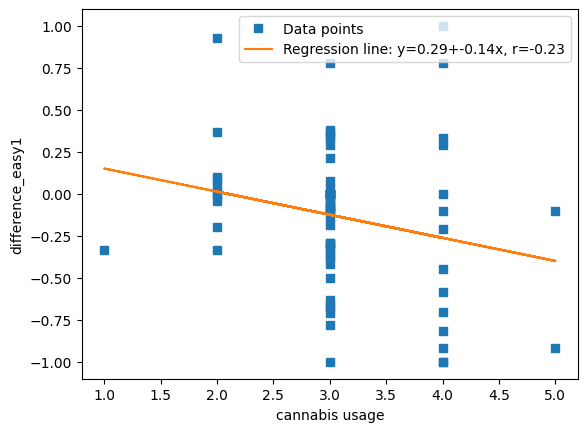

In [227]:
x=performance_diff_and_cannabis_usage['How high are you right now?']
y=performance_diff_and_cannabis_usage['difference_easy1']
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('cannabis usage')
ax.set_ylabel('difference_easy1')
ax.legend(facecolor='white')
plt.show()

In [228]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import sklearn

X = performance_diff_and_cannabis_usage1.drop('difference_easy1', axis=1).drop('difference_easy2', axis=1).drop('difference_medium3', axis=1)  
y1 = performance_diff_and_cannabis_usage1['difference_easy1'] 
y2 = performance_diff_and_cannabis_usage1['difference_easy2'] 
y3 = performance_diff_and_cannabis_usage1['difference_medium3'] 
print(X.dtypes)


#poly = PolynomialFeatures(degree=2)
#X_poly = poly.fit_transform(X)
#model = LinearRegression()  # You can replace this with any other polynomial model (e.g., Ridge, Lasso, etc.)
#model.fit(X, y)
#print(model.coef_)

print(sklearn.feature_selection.f_classif(X,y1))
print(sklearn.feature_selection.f_classif(X,y2))
print(sklearn.feature_selection.f_classif(X,y3))

print(sklearn.feature_selection.f_regression(X,y1))
print(sklearn.feature_selection.f_regression(X,y2))
print(sklearn.feature_selection.f_regression(X,y3))

cannabis_usage                                                                                                            float64
How high are you right now?                                                                                                 int64
Which of the following best captures the number of times you have used cannabis while programming in your entire life?      int64
dtype: object
(array([1.4315338 , 1.72877907, 0.97506192]), array([0.18682857, 0.0865345 , 0.54629984]))
(array([0.74675276, 1.12199579, 0.46192295]), array([0.80592749, 0.37569067, 0.98801582]))
(array([0.85810214, 3.14351733, 1.63237855]), array([0.67792794, 0.00105783, 0.08791621]))
(array([0.63363364, 3.65615072, 0.25933426]), array([0.42879576, 0.06007643, 0.61222651]))
(array([0.51387859, 0.9306323 , 0.42688026]), array([0.47591971, 0.33811698, 0.51572693]))
(array([0.4350441 , 0.51149097, 0.14238556]), array([0.51175194, 0.47694256, 0.70709601]))


In [230]:
print("This block is for exploratory analysis use")
eligible_participants_data["problem_num"]=='1-lax'
problem_B1lax_score = eligible_participants_data[(eligible_participants_data["problem_num"] == "1-lax") & (eligible_participants_data["best_score"] == 1)]
problem_B1_score = eligible_participants_data[(eligible_participants_data["problem_num"] == "1") & (eligible_participants_data["problem_set"] == 'B') & (eligible_participants_data["best_score"]<1)]

# Merge the results
result = pd.merge(problem_B1lax_score, problem_B1_score, on="participant_id", how="inner")
print("Distribution of participants who scored 1 for B1-lax but less than 1 for B1-standard")
print(result["session_type_x"].value_counts())


Distribution of participants who scored 1 for B1-lax but less than 1 for B1-standard
session_type_x
Sober    10
High      5
Name: count, dtype: int64
